## Visualization of results according to hypotheses

In [ ]:
import os
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from datetime import timedelta as td

### Initialization

Definition of general purpose parameters

In [104]:
# Params
d_name = 'Cardiotocography 10%' # dataset name
dirname = '20220322_230431' # output directory
total_budget = 300 # total budget used during search

### Hypothesis 1 - Guided vs. unguided search

*Guided search algorithms (SMAC, Hyperband etc.) will ahve better performance than unguided search like random search.*

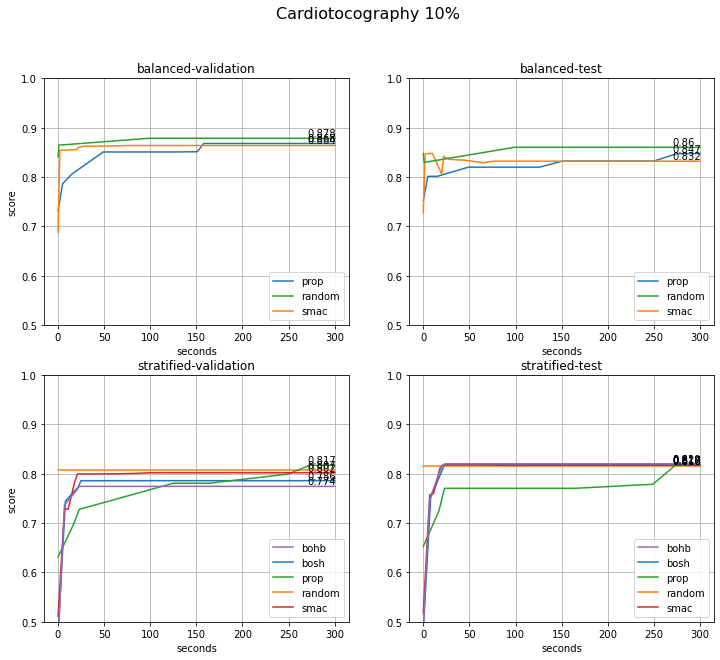

In [107]:
# Figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig_title = d_name
fig.suptitle(fig_title, fontsize=16)
# Plots loop
path = os.path.join(Path.cwd().parent, 'output', dirname, 'performance')
for file in os.listdir(path):
    label = file.split('_')[2]
    df = pd.read_csv(os.path.join(path, file), parse_dates=['Timestamp'])
    # validation score
    x = (df.Timestamp-df.Timestamp[0]).apply(td.total_seconds)
    x.at[x.shape[0]] = total_budget
    yval = df.single_best_optimization_score
    yval.at[yval.shape[0]] = yval.at[yval.shape[0]-1]
    # test score
    ytest = df.single_best_test_score
    ytest.at[ytest.shape[0]] = ytest.at[ytest.shape[0]-1]
    if 'balanced' in file:
        ax1.plot(x, yval, label=label)
        ax1.set_ylim([0.5, 1.])
        ax1.set_xlabel('seconds')
        ax1.set_ylabel('score')
        ax1.set_title('balanced-validation')
        ax1.grid()
        x_ann = 0.9 * x.iloc[-1]
        y_ann = float("{0:.3f}".format(yval.iloc[-1]))
        ax1.annotate((y_ann), (x_ann,1.005*y_ann))
        ax2.plot(x, ytest, label=label)
        ax2.set_ylim([0.5, 1.])
        ax2.set_xlabel('seconds')
        ax2.set_title('balanced-test')
        ax2.grid()
        y_ann = float("{0:.3f}".format(ytest.iloc[-1]))
        ax2.annotate((y_ann), (x_ann,1.005*y_ann))
        for ax in [ax1, ax2]:
            handles, labels = ax.get_legend_handles_labels()
            labels, handles = zip(
                *sorted(zip(labels, handles), key=lambda t: t[0]))
            ax.legend(handles, labels, loc='lower right')
    elif 'stratified' in file:
        ax3.plot(x, yval, label=label)
        ax3.set_ylim([0.5, 1.])
        ax3.set_xlabel('seconds')
        ax3.set_ylabel('score')
        ax3.set_title('stratified-validation')
        ax3.grid()
        x_ann = 0.9 * x.iloc[-1]
        y_ann = float("{0:.3f}".format(yval.iloc[-1]))
        ax3.annotate((y_ann), (x_ann,1.005*y_ann))
        ax4.plot(x, ytest, label=label)
        ax4.set_ylim([0.5, 1.])
        ax4.set_xlabel('seconds')
        ax4.set_title('stratified-test')
        ax4.grid()
        y_ann = float("{0:.3f}".format(ytest.iloc[-1]))
        ax4.annotate((y_ann), (x_ann,1.005*y_ann))
        for ax in [ax3, ax4]:
            handles, labels = ax.get_legend_handles_labels()
            labels, handles = zip(
                *sorted(zip(labels, handles), key=lambda t: t[0]))
            ax.legend(handles, labels, loc='lower right')

### Hypothesis 2 - Stratified vs. balanced validation sets

*Stratified validation sets will result in better performance compared to biased validation sets.*

**Note**: BOSH and BOHB cannot be used with a balanced validation set (i.e. `PredefinedSplit` resampling strategy) at the moment.

In [41]:
# params
methods = ['prop', 'random', 'smac'] # search methods to compare

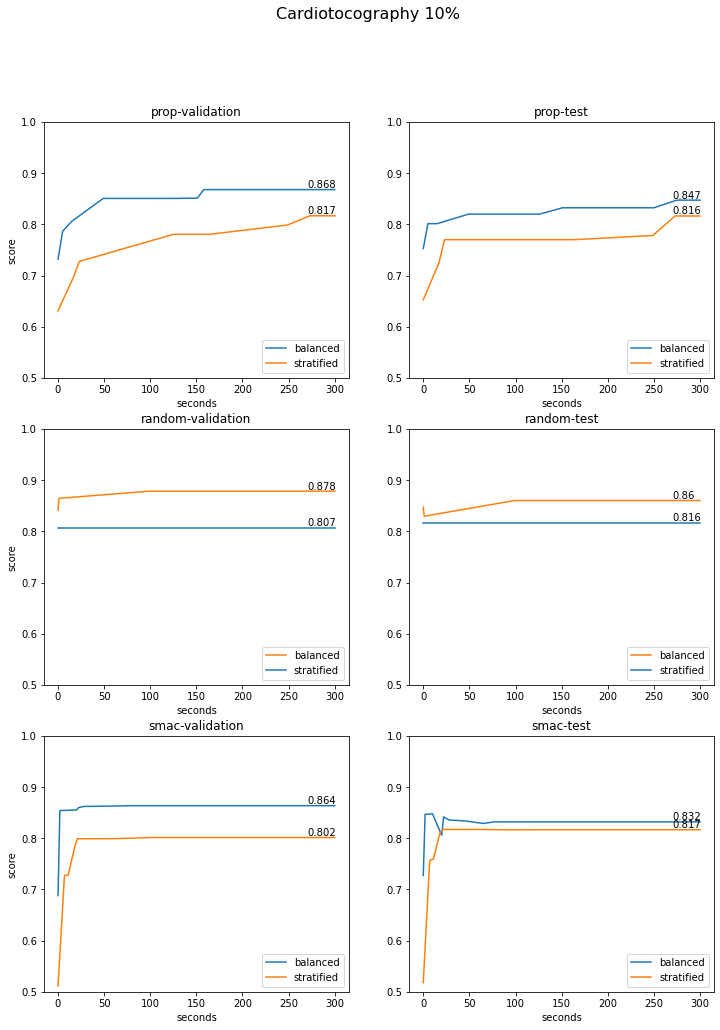

In [109]:
# Figure
fig, axs = plt.subplots(3, 2, figsize=(12, 16))
fig_title = d_name
fig.suptitle(fig_title, fontsize=16)
# Plots loop
path = os.path.join(Path.cwd().parent, 'output', dirname, 'performance')
for file in os.listdir(path):
    label = file.split('_')[3].split('.')[0] # balanced or stratified
    df = pd.read_csv(os.path.join(path, file), parse_dates=['Timestamp'])
    # validation score
    x = (df.Timestamp-df.Timestamp[0]).apply(td.total_seconds)
    x.at[x.shape[0]] = total_budget
    yval = df.single_best_optimization_score
    yval.at[yval.shape[0]] = yval.at[yval.shape[0]-1]
    # test score
    ytest = df.single_best_test_score
    ytest.at[ytest.shape[0]] = ytest.at[ytest.shape[0]-1]
    for index, method in enumerate(methods):
        if method in file:
            axs[index, 0].plot(x, yval, label=label)
            axs[index, 0].set_ylim([0.5, 1.])
            axs[index, 0].set_xlabel('seconds')
            axs[index, 0].set_ylabel('score')
            axs[index, 0].set_title(method+'-validation')
            axs[index, 0].grid()
            handles, labels = axs[index, 0].get_legend_handles_labels()
            labels, handles = zip(
                *sorted(zip(labels, handles), key=lambda t: t[0]))
            axs[index, 0].legend(handles, labels, loc='lower right')
            #
            axs[index, 1].plot(x, ytest, label=label)
            axs[index, 1].set_ylim([0.5, 1.])
            axs[index, 1].set_xlabel('seconds')
            axs[index, 1].set_title(method+'-test')
            axs[index, 1].grid()
            x_ann = 0.9 * x.iloc[-1]
            y_ann = float("{0:.3f}".format(yval.iloc[-1]))
            axs[index, 0].annotate((y_ann), (x_ann,1.005*y_ann))
            y_ann = float("{0:.3f}".format(ytest.iloc[-1]))
            axs[index, 1].annotate((y_ann), (x_ann,1.005*y_ann))

            handles, labels = axs[index, 1].get_legend_handles_labels()
            labels, handles = zip(
                *sorted(zip(labels, handles), key=lambda t: t[0]))
            axs[index, 1].legend(handles, labels, loc='lower right')

### Hypothesis 3 - Larger vs. smaller validation sets

*Larger validation sets (larger amounts of labeled data) will result in better performance compared to smaller validation sets.*

In [72]:
# params
dirname = '20220324_190402'
methods = ['prop', 'random', 'smac'] # search methods to compare

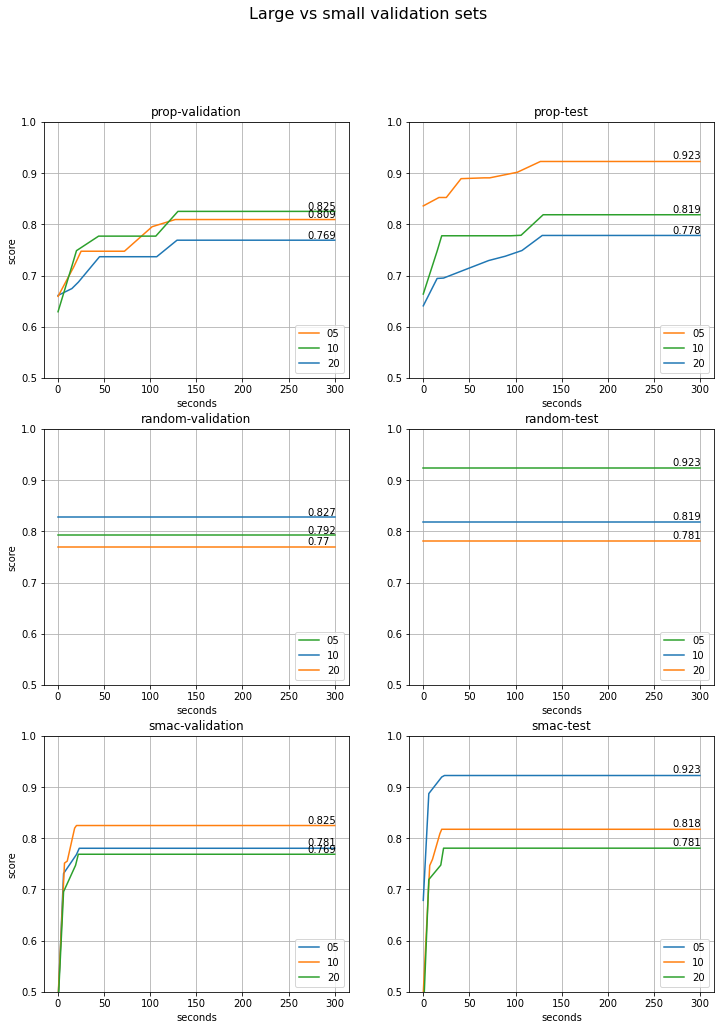

In [101]:
# Figure
fig, axs = plt.subplots(3, 2, figsize=(12, 16))
fig_title = 'Large vs small validation sets'
fig.suptitle(fig_title, fontsize=16)
# Plots loop
path = os.path.join(Path.cwd().parent, 'output', dirname, 'performance')
for file in os.listdir(path):
    label = file.split('_')[1]
    df = pd.read_csv(os.path.join(path, file), parse_dates=['Timestamp'])
    # validation score
    x = (df.Timestamp-df.Timestamp[0]).apply(td.total_seconds)
    x.at[x.shape[0]] = total_budget
    yval = df.single_best_optimization_score
    yval.at[yval.shape[0]] = yval.at[yval.shape[0]-1]
    # test score
    ytest = df.single_best_test_score
    ytest.at[ytest.shape[0]] = ytest.at[ytest.shape[0]-1]
    for index, method in enumerate(methods):
        if method in file and 'stratified' in file:
            axs[index, 0].plot(x, yval, label=label)
            axs[index, 0].set_ylim([0.5, 1.])
            axs[index, 0].set_xlabel('seconds')
            axs[index, 0].set_ylabel('score')
            axs[index, 0].set_title(method+'-validation')
            axs[index, 0].grid()
            x_ann = 0.9 * x.iloc[-1]
            y_ann = float("{0:.3f}".format(yval.iloc[-1]))
            axs[index, 0].annotate((y_ann), (x_ann,1.005*y_ann))
            handles, labels = axs[index, 0].get_legend_handles_labels()
            labels, handles = zip(
                *sorted(zip(labels, handles), key=lambda t: t[0]))
            axs[index, 0].legend(handles, labels, loc='lower right')
            axs[index, 1].plot(x, ytest, label=label)
            axs[index, 1].set_ylim([0.5, 1.])
            axs[index, 1].set_xlabel('seconds')
            axs[index, 1].set_title(method+'-test')
            axs[index, 1].grid()
            y_ann = float("{0:.3f}".format(ytest.iloc[-1]))
            axs[index, 1].annotate((y_ann), (x_ann,1.005*y_ann))
            handles, labels = axs[index, 1].get_legend_handles_labels()
            labels, handles = zip(
                *sorted(zip(labels, handles), key=lambda t: t[0]))
            axs[index, 1].legend(handles, labels, loc='lower right')